### Title of the project- Comparative Perspectives of Boosting Classifiers in Machine Learning

By: PANDIT, Sudip*

### Description of the Project:
+ The "Breast Cancer Dataset" is used in this project. It has df.shape=(569, 31) which means 569 rows and 32 columns. 
+ The link of the datset used  in this project is  -https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
+ I am importing the important python packages- skelarn, pandas, numpy, seaborn and matplotlib to complete the project.
+ The machine learning models such as  Logistic Regression, Decision Tree, Random Forest, XGBoost, AdaBoost and Gradient Boosting classifier have been used.
+ The performance of the  machine learnig models have been tested on the basis of accuracy score, confusion matrix, classification report, f1 score and roc auc score.
+ I had tuned hyperparameters  to improve the perforamnce for XGBoost model 
+ The good visualization is also important along with accuracy score in model building. The performance of the model have been  visualized in this project.  

### Problem statement:

+ The full form of XGBoost is eXtreme Gradient Boosting, also called winner for several kaggle competetion machine learning model. Most of the literatues of Machine Learning found in google has described this model as having best accuracy, efficient and feasibility.
+ It is a decision-tree-based ensemble ML algorithm based on gradient boosting framework.
+ It is considered that XGBoost provides a convenient way of cross-validation.
+ Cross-validation  technique is applied to test the model's  overfitting during the training phase. If the model gives good accuracy in training dataset but the model works very poor in testing unseen dataset then it is  called overfitting or a model of low bias and high variance.
+ I have to  calculate the model training and testing errors with different learning rates.As we know that the best technique to choose the learning rate value is between 0 and 1. I will be going to start the test by putting the learning rate as 0.01.
+ It would easy to see the results through good visualization. I am also going to visualize the training and testing errors and accuracies by making a graph. Finally, I will tune the hyperparameters  which helps us predict the testing datasets i.e. x_test.

### Purpose of the project:
+ The purpose of this project is to provide a quick overview of different classifiers used in machine learning.
+ I compare different classifiers accuracies with XGBoost Classifier and predict why it is important in machine learning model building.
+ This project is focused in Boosting classifier. It will not cover the bagging part (Here, my goal is to identify some of the classifiers accuracies and compare their accuracies with the XGBoost classfier.  

### Reference Documents:
+ I would like to highly recommend to read the article link-https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674. The writer has explained very clearly about the ensemble method. The best part of this article is that he has described about the concept of cascading. 
+ As per Paul(2018), Cascading is one of the most powerful ensemble learning algorithm which is used by Machine Learning engineers and scientists when they want to be absolutely dead sure about the accuracy of a result.
+ I read different articles to prepare this project which are down at end of the project as a reference.

### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

In [ ]:
df=pd.read_csv('cancer.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df['diagnosis']=pd.get_dummies(df['diagnosis'])

### Print the first five rows

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### This gives the shape of the dataset

In [76]:
df.shape

(569, 31)

In [8]:
df.dtypes

diagnosis                    uint8
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### x and y variables (sampling)

In [10]:
x=df.drop('diagnosis', axis=1).values
y=df['diagnosis']

### Scaling the x features in the same scale 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss=StandardScaler()

In [13]:
x_scaled=ss.fit_transform(x)

### Model Building
+ Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
ll=LogisticRegression(solver='lbfgs')

### Split the dataset into training and testing in order to train the model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.30, random_state=62)

In [18]:
ll.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_pred=ll.predict(x_test)

In [20]:
print(y_test)

465    1
274    0
505    1
212    0
87     0
      ..
440    1
349    1
26     0
231    1
168    0
Name: diagnosis, Length: 171, dtype: uint8


### Import the following parameters to test each classification model

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, accuracy_score

In [22]:
confusion_matrix(y_test, y_pred)

array([[ 61,   8],
       [  0, 102]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        69
           1       0.93      1.00      0.96       102

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



In [24]:
f1_score(y_test, y_pred)

0.9622641509433962

In [25]:
print(roc_curve(y_test, y_pred))

(array([0.        , 0.11594203, 1.        ]), array([0., 1., 1.]), array([2, 1, 0]))


In [26]:
roc_auc_score(y_test, y_pred)

0.9420289855072465

### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rr=RandomForestClassifier()

In [29]:
rr.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
y_pred_rr=rr.predict(x_test)

In [31]:
y_pred_rr

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=uint8)

In [32]:
confusion_matrix(y_test, y_pred_rr)

array([[62,  7],
       [ 4, 98]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred_rr)

0.935672514619883

In [34]:
print(classification_report(y_test, y_pred_rr))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        69
           1       0.93      0.96      0.95       102

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [35]:
f1_score(y_test, y_pred_rr)

0.9468599033816426

In [36]:
roc_auc_score(y_test, y_pred_rr)

0.9296675191815857

### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt=DecisionTreeClassifier(max_depth=2)

In [39]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [40]:
y_pred_dt=dt.predict(x_test)

In [41]:
%%time
y_pred_dt

Wall time: 0 ns


array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [42]:
accuracy_score(y_test,y_pred_dt)

0.9005847953216374

In [43]:
f1_score(y_test, y_pred_dt)

0.9170731707317074

In [44]:
roc_auc_score(y_test, y_pred_dt)

0.8955669224211422

In [45]:
confusion_matrix(y_test, y_pred_dt)

array([[60,  9],
       [ 8, 94]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        69
           1       0.91      0.92      0.92       102

    accuracy                           0.90       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.90      0.90      0.90       171



### XGBoost Classifier

In [47]:
from xgboost import XGBClassifier

In [48]:
%%time
model =XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.01)
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train.values.ravel(), early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.04020	validation_0-logloss:0.68482	validation_1-error:0.09942	validation_1-logloss:0.68604
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.04020	validation_0-logloss:0.67700	validation_1-error:0.09357	validation_1-logloss:0.67927
[2]	validation_0-error:0.03266	validation_0-logloss:0.66916	validation_1-error:0.08772	validation_1-logloss:0.67272
[3]	validation_0-error:0.01759	validation_0-logloss:0.66141	validation_1-error:0.06433	validation_1-logloss:0.66598
[4]	validation_0-error:0.02261	validation_0-logloss:0.65450	validation_1-error:0.07018	validation_1-logloss:0.65992
[5]	validation_0-error:0.02764	validation_0-logloss:0.64719	validation_1-error:0.06433	validation_1-logloss:0.65319
[6]	validation_0-error:0.02513	validation_0-logloss:0.64023	validation_1-error:0.06433	validation_1-logloss:0.64709
[7]	validation_0-error:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.33,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred_xgb=model.predict(x_test)

In [50]:
y_pred_xgb

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=uint8)

In [51]:
accuracy_score(y_test, y_pred_xgb)

0.9415204678362573

In [52]:
confusion_matrix(y_test, y_pred_xgb)

array([[63,  6],
       [ 4, 98]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        69
           1       0.94      0.96      0.95       102

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [54]:
f1_score(y_test, y_pred_xgb)

0.9514563106796117

In [55]:
roc_auc_score(y_test, y_pred_xgb)

0.93691389599318

In [56]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.15%


### Training and testing error in Validation

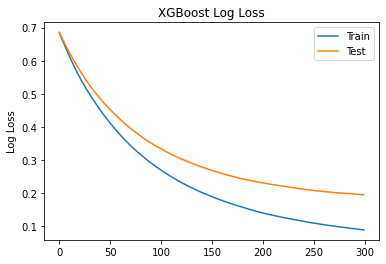

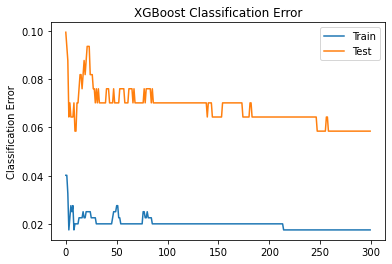

In [57]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Hyperparameter Tuning
+ let's try different learning rates like 0.001, 0.1, 0.2 ...and calculate the accuracy score

In [59]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

clf =XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [60]:
y_pred_xgb_cv=grid.predict(x_test)

In [61]:
accuracy_score(y_test, y_pred_xgb_cv)

0.9473684210526315

In [62]:
confusion_matrix(y_test, y_pred_xgb_cv)

array([[ 62,   7],
       [  2, 100]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred_xgb_cv))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        69
           1       0.93      0.98      0.96       102

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [64]:
print(f1_score(y_test, y_pred_xgb_cv))

0.9569377990430622


In [65]:
roc_auc_score(y_test, y_pred_xgb_cv)

0.9394714407502132

### Different ensemble classifiers
+ Here, I have calculated different ensemble classifiers and compare of each accuracies

In [66]:
#ensemble method
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier

In [67]:
ada_boost = AdaBoostClassifier(n_estimators=5)
grad_boost = GradientBoostingClassifier(n_estimators=10)
xgb_boost = XGBClassifier(max_depth=5, learning_rate=0.001)

In [68]:
from sklearn.model_selection import cross_val_score
ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']

In [69]:
# classifiers performed on the cancer dataset
for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):
    scores = cross_val_score(clf, x, y, cv=3, scoring='accuracy')
    print("Accuracy: {0:.3f}, Variance: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.933, Variance: (+/-) 0.011 [Ada Boost]
Accuracy: 0.931, Variance: (+/-) 0.015 [Gradient Boost]
Accuracy: 0.916, Variance: (+/-) 0.016 [XG Boost]
Accuracy: 0.928, Variance: (+/-) 0.022 [Ensemble]


### Visualization through decision regions
+ Decision regions for all the boosting algorithms
+ let us consider only two independent variables at a time for how the classifiers are working 

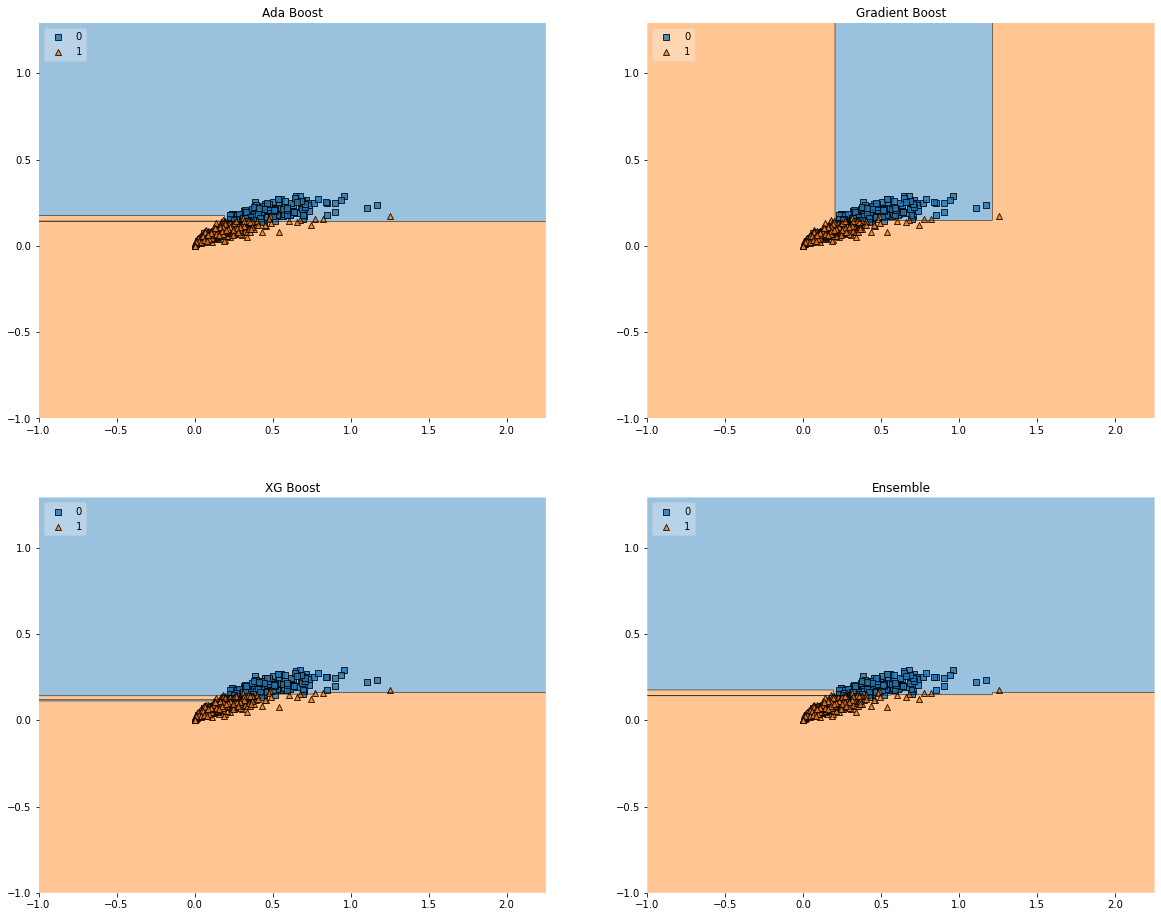

In [70]:
x=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
x=np.array(df[['concavity_worst', 'concave points_worst']])
y=np.array(y)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))
for clf, label, grd in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels, itertools.product([0, 1], repeat=2)):
    clf.fit(x, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(x, y, clf=clf, legend=2)
    plt.title(label)
plt.show()

In [71]:
# The above graph shows that ababoost is working good than other classifiers
ada_boost = AdaBoostClassifier(n_estimators=5)
ada_boost.fit(x_train, y_train)
y_pred_ada_boost=ada_boost.predict(x_test)
confusion_matrix(y_test, y_pred_ada_boost)

array([[57, 12],
       [ 5, 97]], dtype=int64)

In [72]:
print(classification_report(y_test, y_pred_ada_boost))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        69
           1       0.89      0.95      0.92       102

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [73]:
f1_score(y_test, y_pred_ada_boost)

0.9194312796208531

In [74]:
roc_auc_score(y_test, y_pred_ada_boost)

0.8885336743393009

### Results:
+ While comparing accuracies of AdaBoost Classifier and XGBoost, XGBoost Classifier performs the best prediction, with an accuracy of 94.15%.


### References:
+ https://towardsdatascience.com/selecting-optimal-parameters-for-xgboost-model-training-c7cd9ed5e45e
+ https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7
+ https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-4.learning-9c66cb271674
+ https://rasbt.github.io/mlxtend/